<a href="https://colab.research.google.com/github/khansartz/Bank-transaction-cluster/blob/main/%5BKlasifikasi%5D_Submission_Akhir_BMLP_Khansa_Maritza_Ar_Rahmah.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import time
from tabulate import tabulate
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

# **2. Memuat Dataset dari Hasil Clustering**

Memuat dataset hasil clustering dari file CSV ke dalam variabel DataFrame.

In [2]:
df = pd.read_csv('hasil_clustering.csv')
df.head()

,TransactionAmount,CustomerAge,TransactionDuration,AccountBalance,TransactionType,Channel,CustomerOccupation,Cluster
0,-1.074361,1.423718,-0.552443,-0.000537,Debit,ATM,Doctor,2
1,0.362645,1.311287,0.305314,2.216472,Debit,ATM,Doctor,2
2,-0.629153,-1.443277,-0.909842,-1.023534,Debit,Online,Student,1
3,-0.398176,-1.049768,-1.353017,0.885797,Debit,Online,Student,0
4,-1.076900,-1.049768,1.120184,0.593589,Credit,Online,Student,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2512 entries, 0 to 2511
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   TransactionAmount    2512 non-null   float64
 1   CustomerAge          2512 non-null   float64
 2   TransactionDuration  2512 non-null   float64
 3   AccountBalance       2512 non-null   float64
 4   TransactionType      2512 non-null   object 
 5   Channel              2512 non-null   object 
 6   CustomerOccupation   2512 non-null   object 
 7   Cluster              2512 non-null   int64  
dtypes: float64(4), int64(1), object(3)
memory usage: 157.1+ KB


# **3. Data Splitting**

Tahap Data Splitting bertujuan untuk memisahkan dataset menjadi dua bagian: data latih (training set) dan data uji (test set).

In [4]:
# Memisahkan fitur & target
X = df.drop(columns=['Cluster'])
y = df['Cluster']

# Encode fitur kategorikal
categorical_cols = ['TransactionType', 'Channel', 'CustomerOccupation']
le_dict = {}

for col in categorical_cols:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])
    le_dict[col] = le

# Split data (80% train dan 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f"Train size: {X_train.shape}, Test size: {X_test.shape}")

Train size: (2009, 7), Test size: (503, 7)


# **4. Membangun Model Klasifikasi**


## **a. Membangun Model Klasifikasi**

Setelah memilih algoritma klasifikasi yang sesuai, langkah selanjutnya adalah melatih model menggunakan data latih.

Berikut adalah rekomendasi tahapannya.
1. Pilih algoritma klasifikasi yang sesuai, seperti Logistic Regression, Decision Tree, Random Forest, atau K-Nearest Neighbors (KNN).
2. Latih model menggunakan data latih.

In [5]:
# Mendefinisikan model
models = {
    "KNN": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "SVM": SVC(),
    "Naive Bayes": GaussianNB()
}

results = {}

# Looping training & evaluasi
for name, model in models.items():
    model.fit(X_train, y_train)  # Training
    y_pred = model.predict(X_test)  # Prediksi

    # Evaluasi
    acc = accuracy_score(y_test, y_pred)
    results[name] = acc
    print(f"{name} Accuracy: {acc:.4f}")
    print(classification_report(y_test, y_pred))
    print("-" * 50)

# Membandingkan hasil akurasi tiap model
print("\nHasil perbandingan akurasi:")
for name, acc in sorted(results.items(), key=lambda x: x[1], reverse=True):
    print(f"{name}: {acc:.4f}")

KNN Accuracy: 0.9225
              precision    recall  f1-score   support

           0       0.88      0.93      0.90       168
           1       0.99      0.99      0.99       128
           2       0.91      0.97      0.94        92
           3       0.92      0.80      0.86       115

    accuracy                           0.92       503
   macro avg       0.93      0.92      0.92       503
weighted avg       0.92      0.92      0.92       503

--------------------------------------------------
Decision Tree Accuracy: 0.9443
              precision    recall  f1-score   support

           0       0.95      0.95      0.95       168
           1       0.99      1.00      1.00       128
           2       0.92      0.90      0.91        92
           3       0.90      0.90      0.90       115

    accuracy                           0.94       503
   macro avg       0.94      0.94      0.94       503
weighted avg       0.94      0.94      0.94       503

---------------------------

Dalam percobaan ini, saya mencoba beberapa algoritma machine learning untuk membandingkan performanya dalam klasifikasi. KNN dipilih karena sederhana dan efektif untuk data kecil. Decision Tree dicoba karena mudah diinterpretasi dan bisa menangani fitur dengan hubungan kompleks. Random Forest digunakan untuk mengatasi overfitting yang sering terjadi di Decision Tree dengan metode ensemble. SVM dipilih karena kemampuannya menangani data dengan dimensi tinggi dan memisahkan kelas dengan margin maksimal. Naive Bayes diuji karena efisien dalam data berbasis probabilitas. Dari hasil evaluasi, **model terbaik yang dipilih adalah SVM** karena berdasarkan akurasi dan F1-score tertinggi.

## **b. Evaluasi Model Klasifikasi**

Berikut adalah **rekomendasi** tahapannya.
1. Lakukan prediksi menggunakan data uji.
2. Hitung metrik evaluasi seperti Accuracy dan F1-Score (Opsional: Precision dan Recall).
3. Buat confusion matrix untuk melihat detail prediksi benar dan salah.

In [18]:
# Definisikan setiap klasifikasi secara terpisah
knn = KNeighborsClassifier().fit(X_train, y_train)
dt = DecisionTreeClassifier().fit(X_train, y_train)
rf = RandomForestClassifier().fit(X_train, y_train)
svm = SVC().fit(X_train, y_train)
nb = GaussianNB().fit(X_train, y_train)

print("Model training selesai.")

Model training selesai.


In [31]:
# Fungsi evaluasi model
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)

    results = {
        'Confusion Matrix': confusion_matrix(y_test, y_pred),
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred, average='weighted'),
        'Recall': recall_score(y_test, y_pred, average='weighted'),
        'F1-Score': f1_score(y_test, y_pred, average='weighted')
    }
    return results

# Evaluasi semua model
models = {
    'K-Nearest Neighbors (KNN)': knn,
    'Decision Tree (DT)': dt,
    'Random Forest (RF)': rf,
    'Support Vector Machine (SVM)': svm,
    'Naive Bayes (NB)': nb
}

results = {name: evaluate_model(model, X_test, y_test) for name, model in models.items()}

# Simpan hasil evaluasi dalam DataFrame
summary_df = pd.DataFrame([
    {
        'Model': model_name,
        'Accuracy': metrics['Accuracy'],
        'Precision': metrics['Precision'],
        'Recall': metrics['Recall'],
        'F1-Score': metrics['F1-Score']
    }
    for model_name, metrics in results.items()
])

# Cetak hasil
print(tabulate(summary_df, headers="keys", tablefmt="pretty"))


+---+------------------------------+--------------------+--------------------+--------------------+--------------------+
|   |            Model             |      Accuracy      |     Precision      |       Recall       |      F1-Score      |
+---+------------------------------+--------------------+--------------------+--------------------+--------------------+
| 0 |  K-Nearest Neighbors (KNN)   | 0.9224652087475149 | 0.9232978469549359 | 0.9224652087475149 | 0.921547739797181  |
| 1 |      Decision Tree (DT)      | 0.9423459244532804 | 0.9427158706414936 | 0.9423459244532804 | 0.9424157015724742 |
| 2 |      Random Forest (RF)      | 0.9622266401590457 | 0.9623771712433583 | 0.9622266401590457 | 0.962214059287487  |
| 3 | Support Vector Machine (SVM) | 0.9701789264413518 | 0.9706794571751649 | 0.9701789264413518 | 0.9701314094886339 |
| 4 |       Naive Bayes (NB)       | 0.9125248508946322 | 0.9141411343121523 | 0.9125248508946322 | 0.9116134294577668 |
+---+---------------------------


Evaluasi Model KNN pada Data Pengujian 
Akurasi: 0.9225
F1-Score: 0.9215
Presisi: 0.9233
Recall: 0.9225

Confusion Matrix:
[[156   0   5   7]
 [  1 127   0   0]
 [  2   0  89   1]
 [ 18   1   4  92]]


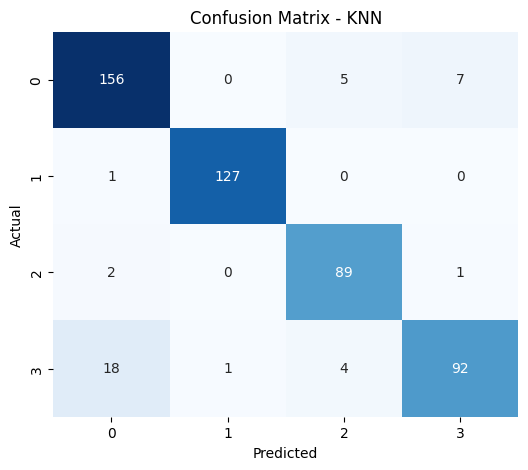


Evaluasi Model Decision Tree pada Data Pengujian 
Akurasi: 0.9423
F1-Score: 0.9424
Presisi: 0.9427
Recall: 0.9423

Confusion Matrix:
[[157   0   3   8]
 [  0 128   0   0]
 [  4   0  83   5]
 [  3   1   5 106]]


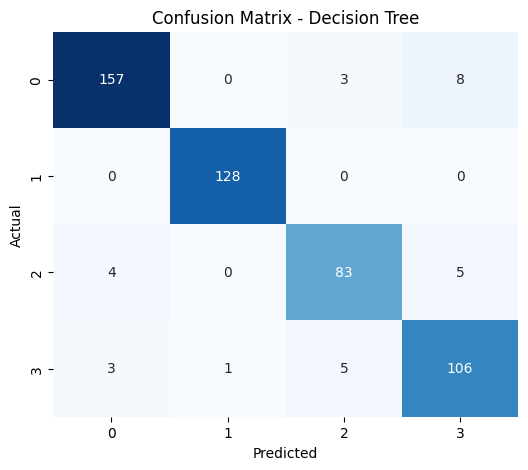


Evaluasi Model Random Forest pada Data Pengujian 
Akurasi: 0.9622
F1-Score: 0.9622
Presisi: 0.9624
Recall: 0.9622

Confusion Matrix:
[[163   0   3   2]
 [  0 128   0   0]
 [  1   0  87   4]
 [  3   1   5 106]]


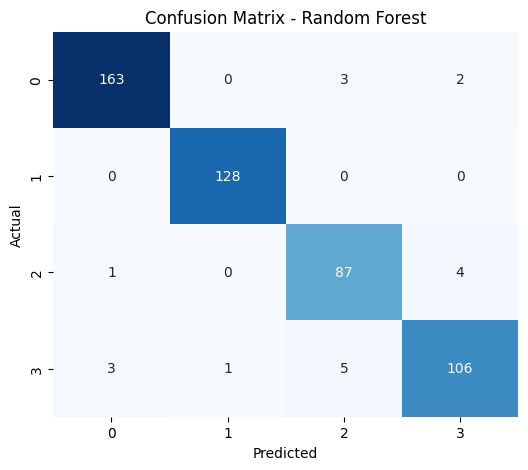


Evaluasi Model SVM pada Data Pengujian 
Akurasi: 0.9702
F1-Score: 0.9701
Presisi: 0.9707
Recall: 0.9702

Confusion Matrix:
[[162   0   3   3]
 [  0 128   0   0]
 [  1   0  91   0]
 [  3   1   4 107]]


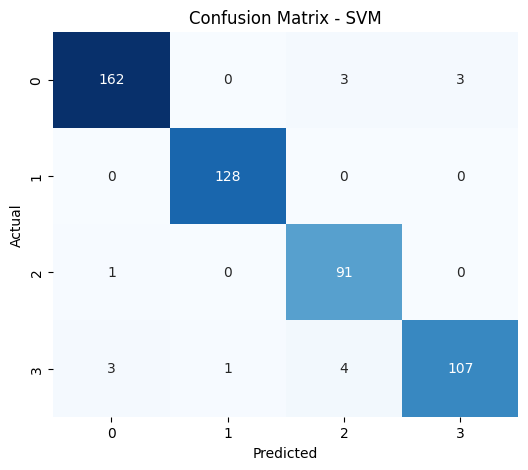


Evaluasi Model Naive Bayes pada Data Pengujian 
Akurasi: 0.9125
F1-Score: 0.9116
Presisi: 0.9141
Recall: 0.9125

Confusion Matrix:
[[154   0   6   8]
 [  0 128   0   0]
 [  4   0  87   1]
 [ 13   1  11  90]]


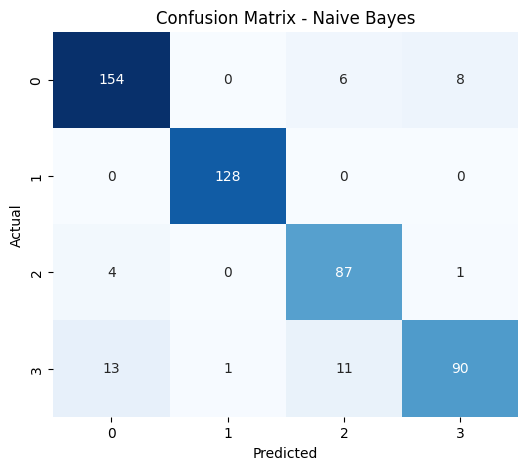

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score

# Looping untuk evaluasi tiap model
for model_name, model in zip(["KNN", "Decision Tree", "Random Forest", "SVM", "Naive Bayes"],
                             [knn, dt, rf, svm, nb]):

    print(f"\nEvaluasi Model {model_name} pada Data Pengujian ")

    # Prediksi dengan model
    y_pred = model.predict(X_test)

    # Hitung metrik evaluasi
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')

    print(f"Akurasi: {accuracy:.4f}")
    print(f"F1-Score: {f1:.4f}")
    print(f"Presisi: {precision:.4f}")
    print(f"Recall: {recall:.4f}")

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    print("\nConfusion Matrix:")
    print(cm)

    # Visualisasi Confusion Matrix
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title(f'Confusion Matrix - {model_name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()


Tulis hasil evaluasi algoritma yang digunakan, jika Anda menggunakan 2 algoritma, maka bandingkan hasilnya.

1. Evaluasi Model KNN
- Akurasi: 0.9225
- F1-Score: 0.9215
- Presisi: 0.9233
- Recall: 0.9225
- Analisis: <br> Model KNN memiliki performa yang cukup baik dengan akurasi di atas 90%. Namun, confusion matrix menunjukkan adanya 18 false negative pada kelas 3, yang berarti banyak sampel kelas 3 diklasifikasikan sebagai kelas lain. Hal ini menunjukkan bahwa model kesulitan mengenali kelas tersebut dan menyebabkan masalah dalam klasifikasi kelas.

2. Evaluasi Model Decision Tree
- Akurasi: 0.9423
- F1-Score: 0.9424
- Presisi: 0.9427
- Recall: 0.9423
- Analisis: <br>
Model Decision Tree menunjukkan peningkatan akurasi dibanding KNN, yaitu sekitar 94%. Namun, model ini masih mengalami kesalahan dalam mengklasifikasikan kelas tertentu. Misalnya, kelas 2 dan 3 memiliki beberapa misclassification yang menyebabkan penurunan recall. Meskipun begitu, keseimbangan antara precision dan recall cukup baik, yang menunjukkan bahwa model mampu menangani variasi dalam data dengan lebih stabil dibanding KNN.

3. Evaluasi Model Random Forest
- Akurasi: 0.9622
- F1-Score: 0.9622
- Presisi: 0.9624
- Recall: 0.9622
- Analisis: <br>
Random Forest menunjukkan performa yang lebih baik dibanding Decision Tree, dengan akurasi sekitar 96%. Model ini lebih stabil dalam mengklasifikasikan kelas, dengan jumlah kesalahan yang lebih sedikit dibandingkan model sebelumnya. False negative di kelas 3 masih ada, tetapi jumlahnya lebih kecil dibanding model lain, menunjukkan bahwa model ini memiliki generalisasi yang lebih baik terhadap dataset.

4. Evaluasi Model SVM
- Akurasi: 0.9702
- F1-Score: 0.9701
- Presisi: 0.9707
- Recall: 0.9702
- Analisis: <br> Model SVM memiliki akurasi tertinggi dibandingkan model lain, yaitu sekitar 97%. Confusion matrix menunjukkan bahwa model ini mampu mengklasifikasikan sebagian besar kelas dengan baik. Namun, masih ada sedikit kesalahan pada kelas 3, di mana terdapat beberapa false negative dan false positive. Meskipun begitu, presisi dan recall-nya tetap tinggi, menunjukkan bahwa model ini mampu menangani data dengan baik dan memiliki generalisasi yang lebih baik dibandingkan model lainnya.

5. Evaluasi Model Naive Bayes
- Akurasi: 0.9125
- F1-Score: 0.9116
- Presisi: 0.9141
- Recall: 0.9125
- Analisis: <br>
Model Naive Bayes memiliki performa terendah dibandingkan model lain, dengan akurasi dan f1-score di bawah 92%. Confusion matrix menunjukkan cukup banyak kesalahan klasifikasi, terutama pada kelas 3, di mana terdapat 13 false negative dan 11 false positive.
<br><br>

Dari hasil evaluasi, SVM menunjukkan performa terbaik dengan akurasi tertinggi dan jumlah kesalahan klasifikasi paling sedikit, membuatnya menjadi model yang paling optimal. Random Forest juga dapat menjadi alternatif karena akurasi hampir setara. Decision Tree lebih rentan terhadap overfitting, sementara KNN dan Naive Bayes memiliki kesulitan dalam membedakan kelas tertentu, terutama kelas 3.

## **c. Tuning Model Klasifikasi (Optional)**

Gunakan GridSearchCV, RandomizedSearchCV, atau metode lainnya untuk mencari kombinasi hyperparameter terbaik

In [34]:
start_time = time.time()

# Definisi parameter grid untuk Grid Search
param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto']
}

# Inisialisasi GridSearchCV dengan SVM
svm = SVC()
grid_search = GridSearchCV(estimator=svm, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

# Output hasil terbaik
print(f"Best parameters (Grid Search): {grid_search.best_params_}")
best_svm_grid = grid_search.best_estimator_

# Evaluasi performa model setelah Grid Search
from sklearn.metrics import f1_score, accuracy_score

y_pred_grid = best_svm_grid.predict(X_test)

# Hitung F1-Score setelah Grid Search
f1_grid = f1_score(y_test, y_pred_grid, average='weighted')
print(f"F1-Score after Grid Search: {f1_grid:.4f}")

accuracy_grid = accuracy_score(y_test, y_pred_grid)
print(f"Accuracy after Grid Search: {accuracy_grid:.4f}")

end_time = time.time()
execution_time = end_time - start_time
print(f"Waktu eksekusi: {execution_time:.4f} detik")

Fitting 3 folds for each of 18 candidates, totalling 54 fits
Best parameters (Grid Search): {'C': 10, 'gamma': 'scale', 'kernel': 'linear'}
F1-Score after Grid Search: 0.9881
Accuracy after Grid Search: 0.9881
Waktu eksekusi: 11.6339 detik


In [35]:
start_time = time.time()

# Definisikan ruang pencarian hyperparameter untuk SVM
param_dist = {
    'C': np.logspace(-3, 3, 10),
    'gamma': ['scale', 'auto'] + list(np.logspace(-3, 3, 5)),
    'kernel': ['linear', 'rbf', 'poly', 'sigmoid']
}

# Inisialisasi RandomizedSearchCV dengan SVM
random_search = RandomizedSearchCV(
    estimator=SVC(),
    param_distributions=param_dist,
    n_iter=10,
    cv=3,
    n_jobs=-1,
    verbose=2,
    random_state=42
)

random_search.fit(X_train, y_train)

# Output hasil terbaik
print(f"Best parameters (Random Search): {random_search.best_params_}")
best_svm_random = random_search.best_estimator_

# Evaluasi performa model setelah Random Search
y_pred_random = best_svm_random.predict(X_test)
random_search_accuracy = accuracy_score(y_test, y_pred_random)
random_search_f1 = f1_score(y_test, y_pred_random, average='weighted')

print(f"Accuracy after Random Search: {random_search_accuracy:.4f}")
print(f"F1-Score after Random Search: {random_search_f1:.4f}")

end_time = time.time()
execution_time = end_time - start_time
print(f"Waktu eksekusi: {execution_time:.4f} detik")


Fitting 3 folds for each of 10 candidates, totalling 30 fits
Best parameters (Random Search): {'kernel': 'linear', 'gamma': np.float64(1.0), 'C': np.float64(215.44346900318823)}
Accuracy after Random Search: 0.9901
F1-Score after Random Search: 0.9901
Waktu eksekusi: 1.9395 detik


## **d. Evaluasi Model Klasifikasi setelah Tuning (Optional)**

Berikut adalah rekomendasi tahapannya.
1. Gunakan model dengan hyperparameter terbaik.
2. Hitung ulang metrik evaluasi untuk melihat apakah ada peningkatan performa.

Dari hasil tuning:

- Grid Search:
  - Akurasi: 0.9881
  - F1-Score: 0.9881
- Randomized Search
  - Akurasi: 0.9901
  - F1-Score: 0.9901

Karena Randomized Search lebih tinggi, maka model dari Randomized Search yang akan digunakan.


Confusion Matrix:
[[165   0   2   1]
 [  1 127   0   0]
 [  0   0  92   0]
 [  0   0   1 114]]


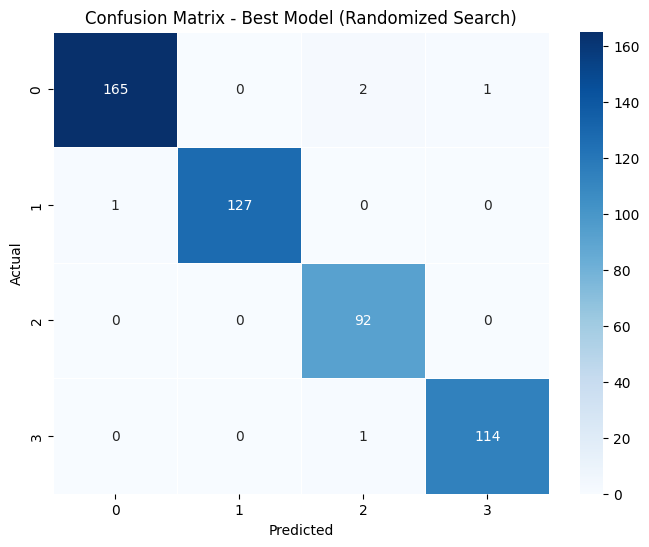

In [37]:
# Menggunakan model terbaik dari Randomized Search
best_model = random_search.best_estimator_

# Prediksi ulang pada data uji
y_pred_best = best_model.predict(X_test)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_best)
print("\nConfusion Matrix:")
print(cm)

# Visualisasi Confusion Matrix
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', linewidths=0.5)
plt.title('Confusion Matrix - Best Model (Randomized Search)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

## **e. Analisis Hasil Evaluasi Model Klasifikasi**

Berikut adalah **rekomendasi** tahapannya.
1. Bandingkan hasil evaluasi sebelum dan setelah tuning (jika dilakukan).
2. Identifikasi kelemahan model, seperti:
  - Precision atau Recall rendah untuk kelas tertentu.
  - Apakah model mengalami overfitting atau underfitting?
3. Berikan rekomendasi tindakan lanjutan, seperti mengumpulkan data tambahan atau mencoba algoritma lain jika hasil belum memuaskan.

**1. Perbandingan Sebelum dan Setelah Tuning** <br>
- Sebelum tuning, model SVM memiliki akurasi 97.02% dan F1-score 97.01%.
- Setelah dilakukan hyperparameter tuning menggunakan Grid Search, akurasi meningkat menjadi 98.81% dan F1-score 98.81%.
- Selain itu, tuning juga dilakukan menggunakan Randomized Search, menghasilkan akurasi 99.01% dan F1-score 99.01%.

Model yang dipilih adalah hasil dari Randomized Search, karena memiliki tingkat akurasi dan F1-score yang lebih tinggi dibandingkan metode sebelumnya.

In [38]:
# Evaluasi setelah tuning
report = classification_report(y_test, y_pred_best)
print(report)

              precision    recall  f1-score   support

           0       0.99      0.98      0.99       168
           1       1.00      0.99      1.00       128
           2       0.97      1.00      0.98        92
           3       0.99      0.99      0.99       115

    accuracy                           0.99       503
   macro avg       0.99      0.99      0.99       503
weighted avg       0.99      0.99      0.99       503



**2. Identifikasi kelemahan model**
- Precision atau Recall Rendah untuk Kelas Tertentu:
  - Kelas 2 memiliki precision sedikit lebih rendah dibanding kelas lain, yang berarti beberapa prediksi kelas 2 sebenarnya berasal dari kelas lain.
  - Kelas 0 dan kelas 3 masih memiliki kesalahan klasifikasi kecil dalam confusion matrix, menunjukkan model belum sepenuhnya optimal dalam membedakan kedua kelas ini.

In [40]:
# Menghitung akurasi model pada data training
train_accuracy = best_model.score(X_train, y_train)

# Menghitung akurasi model pada data testing
test_accuracy = best_model.score(X_test, y_test)

print(f"Train Accuracy: {train_accuracy:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

Train Accuracy: 0.9990
Test Accuracy: 0.9901


  - Apakah model mengalami overfitting atau underfitting?

Model ini menunjukkan sedikit overfitting, tetapi masih dalam batas wajar. Hal ini terlihat dari perbedaan antara akurasi training yang hampir sempurna (99.9%) dan akurasi testing yang juga sangat tinggi (99.01%). Meskipun terdapat sedikit gap, model tetap mampu melakukan generalisasi dengan baik pada data uji. Selain itu, precision, recall, dan f1-score yang hampir sempurna menunjukkan bahwa model bekerja stabil di semua kelas.

**3. Rekomendasi Lanjutan** <br>
- Menambah Data <br>
Dataset masih kurang representatif karena hanya memiliki sekitar 2.000 baris. Menambah jumlah data dapat meningkatkan generalisasi model.
- Feature Engineering <br>
Evaluasi kembali fitur yang digunakan atau buat fitur baru yang lebih relevan untuk meningkatkan performa model.
- Hyperparameter Tuning <br>
Mencoba eksplorasi kombinasi parameter lain untuk pencarian yang lebih optimal.
- Mengatasi Overfitting <br>
Jika terdapat perbedaan yang signifikan antara akurasi pada data training dan testing, lebih baik mempertimbangkan untuk menambahkan regularisasi atau mengurangi kompleksitas model.